In [66]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
if os.getcwd().endswith("notebook"):
    os.chdir("..")
print(os.getcwd())

/Users/howechen/Project/ntu_ai6102_LLM_privacy_leakage_detection


In [3]:
os.listdir('results')

['lr_ngram_',
 '.DS_Store',
 'lr_tfidf_',
 'rf_tfidf_',
 'rf_ngram_',
 'svm_tfidf_',
 'svm_ngram_']

In [19]:
test_result_base = []
test_result_cv = []
results_dir_name = ['lr_ngram_',
                    'lr_tfidf_',
                    'rf_tfidf_',
                    'rf_ngram_',
                    'svm_tfidf_',
                    'svm_ngram_']
for result_dir in results_dir_name:
    dir_path = os.path.join('results', result_dir)
    file_list = os.listdir(dir_path)
    for file in file_list:
        if file.startswith(f'{result_dir}base_metrics'):
            with open(os.path.join(dir_path, file)) as f:
                test_result_base.append(json.load(f))
        elif file.startswith(f'{result_dir}cv_metrics'):
            with open(os.path.join(dir_path, file)) as f:
                test_result_cv.append(json.load(f))

In [20]:
test_result_base = pd.DataFrame(test_result_base)
test_result_cv = pd.DataFrame(test_result_cv)
test_result_base['model'] = ['lr_ngram_', 'lr_tfidf_', 'rf_tfidf_', 'rf_ngram_', 'svm_tfidf_', 'svm_ngram_']
test_result_cv['model'] = ['lr_ngram_', 'lr_tfidf_', 'rf_tfidf_', 'rf_ngram_', 'svm_tfidf_', 'svm_ngram_']
test_result_base['model'] = test_result_base['model'].apply(lambda x: str(x)[:-1])
test_result_cv['model'] = test_result_cv['model'].apply(lambda x: str(x)[:-1])
test_result_base = test_result_base.set_index('model')
test_result_cv = test_result_cv.set_index('model')
result_comparison = pd.concat([test_result_base, test_result_cv], axis=1, keys=['base', 'cv'])
test_result_base = test_result_base.apply(lambda x: round(x, 3))
test_result_cv = test_result_cv.apply(lambda x: round(x, 3))
test_result_base = test_result_base.sort_values('accuracy', ascending=False)
test_result_cv = test_result_cv.sort_values('accuracy', ascending=False)

In [21]:
test_result_base

,accuracy,precision,recall,f1_score
model,,,,
svm_ngram,0.917,0.881,0.967,0.922
svm_tfidf,0.908,0.879,0.951,0.913
lr_ngram,0.892,0.875,0.918,0.896
rf_ngram,0.883,0.873,0.902,0.887
rf_tfidf,0.867,0.817,0.951,0.879
lr_tfidf,0.850,0.821,0.902,0.859


In [22]:
test_result_cv

,accuracy,precision,recall,f1_score
model,,,,
svm_tfidf,0.925,0.894,0.967,0.929
lr_tfidf,0.917,0.881,0.967,0.922
rf_ngram,0.917,0.892,0.951,0.921
svm_ngram,0.917,0.892,0.951,0.921
lr_ngram,0.908,0.879,0.951,0.913
rf_tfidf,0.892,0.853,0.951,0.899


In [23]:
result_comparison

base                                      cv            \
           accuracy precision    recall  f1_score  accuracy precision   
model                                                                   
lr_ngram   0.891667  0.875000  0.918033  0.896000  0.908333  0.878788   
lr_tfidf   0.850000  0.820896  0.901639  0.859375  0.916667  0.880597   
rf_tfidf   0.866667  0.816901  0.950820  0.878788  0.891667  0.852941   
rf_ngram   0.883333  0.873016  0.901639  0.887097  0.916667  0.892308   
svm_tfidf  0.908333  0.878788  0.950820  0.913386  0.925000  0.893939   
svm_ngram  0.916667  0.880597  0.967213  0.921875  0.916667  0.892308   

                               
             recall  f1_score  
model                          
lr_ngram   0.950820  0.913386  
lr_tfidf   0.967213  0.921875  
rf_tfidf   0.950820  0.899225  
rf_ngram   0.950820  0.920635  
svm_tfidf  0.967213  0.929134  
svm_ngram  0.950820  0.920635

In [36]:
accuracy_comparison = result_comparison.loc[:, [('base', 'accuracy'), ('cv', 'accuracy')]]
accuracy_comparison

,base,cv
,accuracy,accuracy
model,,
lr_ngram,0.891667,0.908333
lr_tfidf,0.850000,0.916667
rf_tfidf,0.866667,0.891667
rf_ngram,0.883333,0.916667
svm_tfidf,0.908333,0.925000
svm_ngram,0.916667,0.916667


In [54]:
accuracy_comparison['increase'] = (accuracy_comparison[('cv', 'accuracy')] - accuracy_comparison[('base', 'accuracy')]) / accuracy_comparison[('base', 'accuracy')] * 100

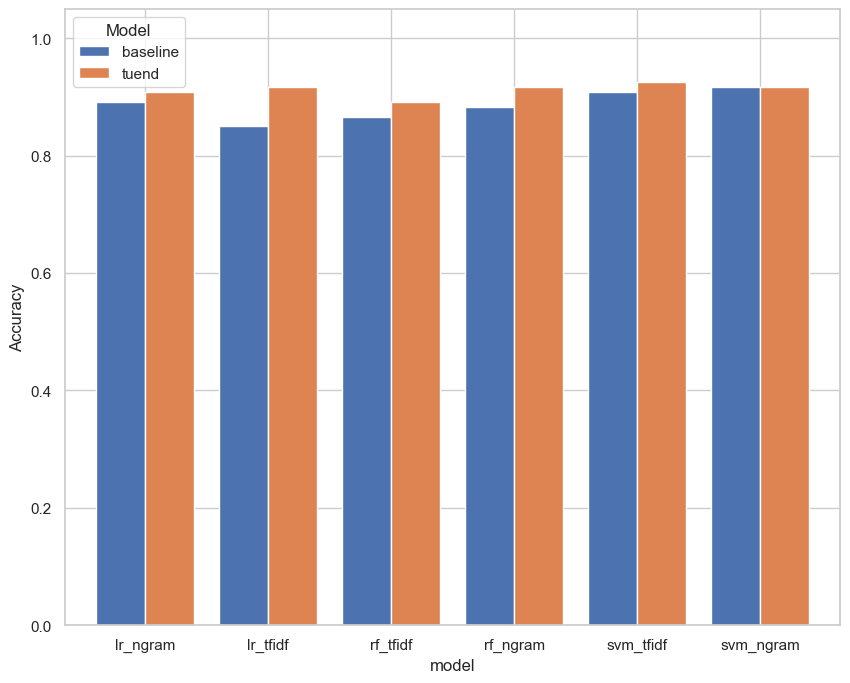

In [61]:
accuracy_comparison.loc[:,[('base','accuracy'), ('cv','accuracy')]].plot(kind='bar', figsize=(10, 8), width=0.8)
plt.xticks(rotation=0)
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.legend(title='Model', labels=['baseline', 'tuend'], loc='upper left')

(0.0, 1.05)

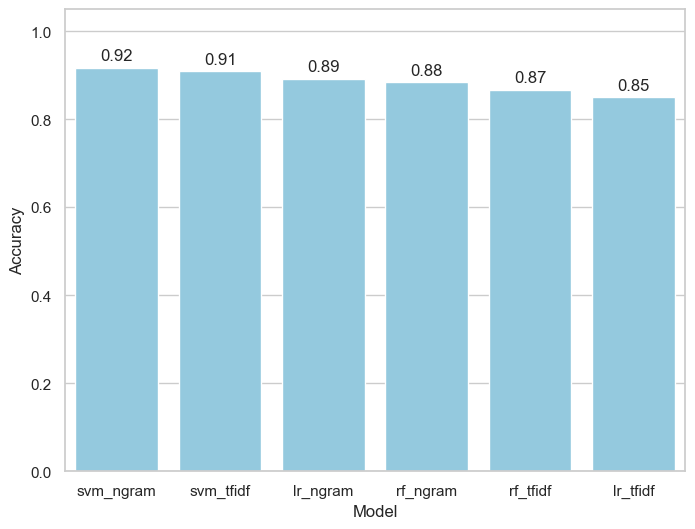

In [ ]:
# Create barplot with improved color palette and value annotations
plt.figure(figsize=(8, 6))
sns.barplot(x='model', y='accuracy', data=test_result_base.reset_index(), color='skyblue')

# Add value labels on top of each bar
for index, row in test_result_base.reset_index().iterrows():
    plt.text(index, row['accuracy'] + 0.01, f"{row['accuracy']:.2f}", ha='center', va='bottom')

# Set plot labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
# plt.title('Model Accuracy Comparison')
# plt.xticks(rotation=45)
plt.ylim(0, 1.05)  # Ensures space for the label on top